In [37]:
import torch
from IPython import display
from d2l import torch as d2l
import myKit
import os
import numpy as np
import collections
import torch.utils.data as Data

In [38]:
from torch import nn

In [39]:
class Animator:  #@save
    """在动画中绘制数据"""
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                 figsize=(14, 7)):
        # 增量地绘制多条线
        if legend is None:
            legend = []
        d2l.use_svg_display()
        self.fig, self.axes = d2l.plt.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes, ]
        # 使用lambda函数捕获参数
        self.config_axes = lambda: d2l.set_axes(
            self.axes[0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts

    def add(self, x, y):
        # 向图表中添加多个数据点
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)
    
    def save(self):
        plt_save_path = './data_distribution/data_distribution1.png'
        self.fig.savefig(plt_save_path)


In [40]:
data_dir = '../data/archive/'
# labels = read_csv_labels_noMale(os.path.join(data_dir, 'boneage-training-dataset.csv'))
# labels['2277']
id, age, male = myKit.read_labels(data_dir, 'valid-dataset.csv')
id1, age1, male1 = myKit.read_labels(data_dir, 'boneage-training-dataset.csv')
datasize = len(age)
datasize1 = len(age1)
# labels = pd.read_csv(os.path.join(data_dir, 'boneage-training-dataset.csv'))
# row = labels.iloc[1]
# str(row['id'])
# filename = os.path.join(data_dir, 'boneage-valid-dataset', f"{row['id']}.png")
# filename
# type(row['boneage'])
# # len(labels)
# # for i in labels.values():
# #     print(i)
# # labels.get('1377', 0)
# collections.Counter(labels.values())
# age_list = list(np.array(list(labels.values()))[:, 0])
# class_count = collections.Counter(age_list)
# class_count.keys()
# type(labels.iloc[0])

In [41]:
def valid_fn(valid_age, valid_gender):
    """验证函数：输入参数：网络，验证数据，验证性别，验证标签
    输出：返回MAE损失"""
    mean, std, zscore = myKit.standardization(valid_age)
    dataset = Data.TensorDataset(zscore, valid_gender)
    valid_iter = Data.DataLoader(
        dataset=dataset,
        batch_size=64,
        shuffle=True
    )
    grand_age = []
    for idx, (batch_age, batch_gender) in enumerate(valid_iter):
        grand_age.extend(batch_age*std + mean)
    return grand_age

In [42]:
# valid = valid_fn(age, male)
# valid = list(map(lambda x: int(x), valid))
# # sum(valid)/len(valid)
# type(valid)
# new_valid = []
# loss = nn.L1Loss(reduction="sum")
# for i in valid:
#     new_valid.append(i.item()+10)
# for i, j in zip(valid, new_valid):
#     print(loss(i, j).item())

In [43]:
output = collections.Counter(age)
grand_true = collections.Counter(age1)
# for this_age in output.keys():
#     print(type(this_age))
# for this_age in dict(output).values():
#     print(type(this_age))
for this in output.items():
    print(type(this[0]))

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'tor

In [44]:
def sort_by_key(d):
    """按键值的数字大小给字典排序， 输入必须要是字典"""
    # return sorted(d.items(), key=lambda k:k[0].astype('int'))
    return sorted(d.items())

# print(dict(sort_by_key(output)))


In [45]:
def list_class_counter(input):
    """得到一个列表中所有类别的数量，返回counter类型，key和values都为int"""
    input = list(map(lambda x: int(x), input))
    input = collections.Counter(input)
    return input
# this = list_class_counter(output)
# this

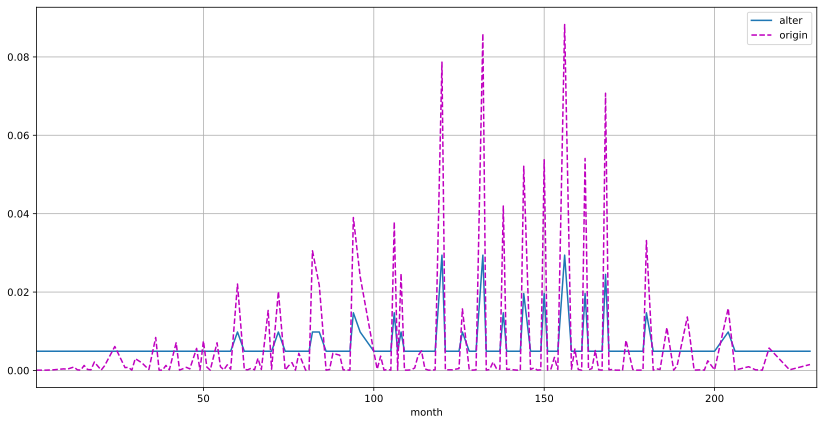

In [46]:
def print_data_distribution(output, grand_true):
    output  = list_class_counter(output)
    grand_true = list_class_counter(grand_true)
    legend = ['alter', 'origin']
    animator = Animator(xlabel='month', xlim=[1, 230], legend=legend)
    output = dict(sort_by_key(output))
    grand_true = dict(sort_by_key(grand_true))
    for valid, true in zip(output.items(), grand_true.items()):
        age_valid , num_valid= valid
        num_valid = num_valid / datasize
        age_true, num_true = true
        num_true = num_true / datasize1
        animator.add(age_valid, (num_valid, num_true))
    animator.save()
print_data_distribution(output, grand_true)

In [47]:
output

Counter({tensor([180.], dtype=torch.float64): 1,
         tensor([12.], dtype=torch.float64): 1,
         tensor([94.], dtype=torch.float64): 1,
         tensor([120.], dtype=torch.float64): 1,
         tensor([82.], dtype=torch.float64): 1,
         tensor([138.], dtype=torch.float64): 1,
         tensor([150.], dtype=torch.float64): 1,
         tensor([156.], dtype=torch.float64): 1,
         tensor([36.], dtype=torch.float64): 1,
         tensor([138.], dtype=torch.float64): 1,
         tensor([126.], dtype=torch.float64): 1,
         tensor([138.], dtype=torch.float64): 1,
         tensor([156.], dtype=torch.float64): 1,
         tensor([180.], dtype=torch.float64): 1,
         tensor([132.], dtype=torch.float64): 1,
         tensor([57.], dtype=torch.float64): 1,
         tensor([120.], dtype=torch.float64): 1,
         tensor([188.], dtype=torch.float64): 1,
         tensor([4.], dtype=torch.float64): 1,
         tensor([132.], dtype=torch.float64): 1,
         tensor([24.], dtyp

In [48]:
def animator_output_grand_true(output, grand_true):
    legend = ['output', 'grand true']
    animator = d2l.Animator(xlabel='pic_num', ylabel='age', legend=legend)
    count = 0
    for valid, true in zip(output, grand_true):
        count += 1
        animator.add(count, (valid, true+3))

# animator_output_grand_true(valid, valid)